In [2]:

# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# # Import psql to run queries 

# import pandasql as psql    

In [5]:
train=pd.read_csv(r"C:\Users\91630\Downloads\Airline Passenger Satisfaction\train.csv")
test=pd.read_csv(r"C:\Users\91630\Downloads\Airline Passenger Satisfaction\test.csv")



In [6]:
print(test.head())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              4   
1                                  1                       3            

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
del train["Unnamed: 0"]
del test["Unnamed: 0"]
del train["id"]
del test["id"]

In [9]:
print(test.isnull().sum())

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64


In [10]:
print(train.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [11]:
from sklearn.impute import KNNImputer
imputer_int=KNNImputer(missing_values=np.nan,n_neighbors=5,weights="uniform",metric="nan_euclidean",copy=True,add_indicator=False)
train['Arrival Delay in Minutes'] = imputer_int.fit_transform(train[['Arrival Delay in Minutes']])
test['Arrival Delay in Minutes'] = imputer_int.fit_transform(test[['Arrival Delay in Minutes']])

In [12]:
print(train.isnull().sum())
print(test.isnull().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Gender                               0
Customer Type                        0
Age         

In [13]:
print(train["Gender"].value_counts())
print(train["Customer Type"].value_counts())
print(train["Type of Travel"].value_counts())
print(train["Class"].value_counts())
print(train["satisfaction"].value_counts())


Female    52727
Male      51177
Name: Gender, dtype: int64
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [14]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
train["Gender"]=LE.fit_transform(train["Gender"])
train["Customer Type"]=LE.fit_transform(train["Customer Type"])
train["Type of Travel"]=LE.fit_transform(train["Type of Travel"])
train["Class"]=LE.fit_transform(train["Class"])
train["satisfaction"]=LE.fit_transform(train["satisfaction"])

test["Gender"]=LE.fit_transform(test["Gender"])
test["Customer Type"]=LE.fit_transform(test["Customer Type"])
test["Type of Travel"]=LE.fit_transform(test["Type of Travel"])
test["Class"]=LE.fit_transform(test["Class"])
test["satisfaction"]=LE.fit_transform(test["satisfaction"])



In [15]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [16]:
IndepVar = []
for col in train.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_train = train[IndepVar]
y_train = train[TargetVar]

In [17]:
IndepVar = []
for col in test.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x_test = test[IndepVar]
y_test = test[TargetVar]


In [18]:
cols1=['Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
      ]

In [19]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [20]:
Results = pd.read_csv(r"C:\Users\91630\OneDrive\Documents\result.csv", header=0)
Results.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 9235  2168]
 [ 1176 13397]]
Outcome values : 
 9235 2168 1176 13397
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.81      0.85     11403
           0       0.86      0.92      0.89     14573

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Accuracy : 87.1 %
Precision : 88.7 %
Recall : 81.0 %
F1 Score : 0.847
Specificity or True Negative Rate : 91.9 %
Balanced Accuracy : 86.4 %
MCC : 0.738
roc_auc_score: 0.865


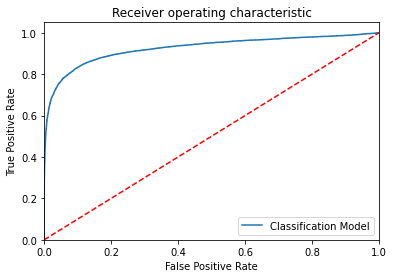

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[10598   805]
 [  940 13633]]
Outcome values : 
 10598 805 940 13633
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.93      0.92     11403
           0       0.94      0.94      0.94     14573

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy : 93.3 %
Precision : 91.9 %
Recall : 92.9 %
F1 Score : 0.924
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 93.2 %
MCC : 0.864
roc_auc_score: 0.932


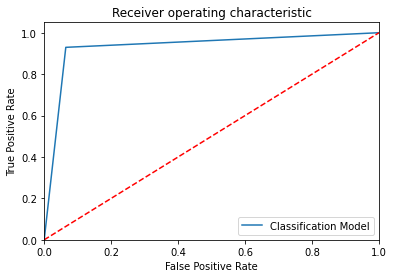

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[10654   749]
 [  299 14274]]
Outcome values : 
 10654 749 299 14274
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95     11403
           0       0.95      0.98      0.96     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.0 %
Precision : 97.3 %
Recall : 93.4 %
F1 Score : 0.953
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.6 %
MCC : 0.918
roc_auc_score: 0.957


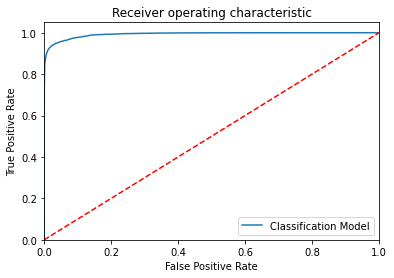

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[10702   701]
 [  292 14281]]
Outcome values : 
 10702 701 292 14281
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.3 %
Recall : 93.9 %
F1 Score : 0.956
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 96.0 %
MCC : 0.923
roc_auc_score: 0.959


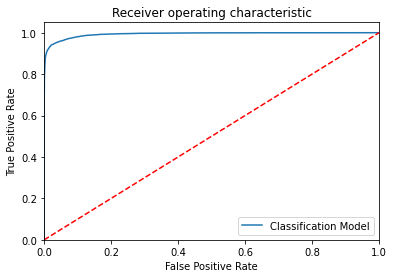

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[10025  1378]
 [  457 14116]]
Outcome values : 
 10025 1378 457 14116
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.88      0.92     11403
           0       0.91      0.97      0.94     14573

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy : 92.9 %
Precision : 95.6 %
Recall : 87.9 %
F1 Score : 0.916
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 92.4 %
MCC : 0.858
roc_auc_score: 0.924


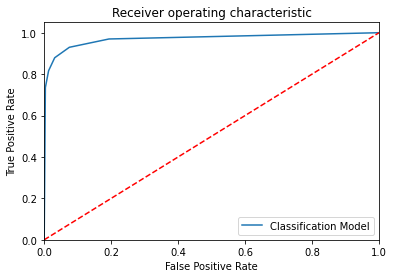

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 9094  2309]
 [ 1287 13286]]
Outcome values : 
 9094 2309 1287 13286
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.80      0.83     11403
           0       0.85      0.91      0.88     14573

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976

Accuracy : 86.2 %
Precision : 87.6 %
Recall : 79.8 %
F1 Score : 0.835
Specificity or True Negative Rate : 91.2 %
Balanced Accuracy : 85.5 %
MCC : 0.719
roc_auc_score: 0.855


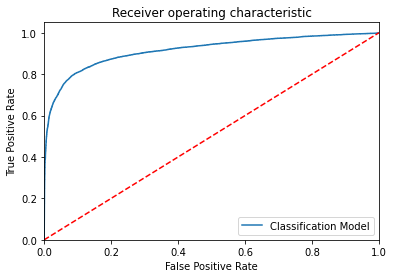

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[10665   738]
 [  382 14191]]
Outcome values : 
 10665 738 382 14191
Classification report : 
               precision    recall  f1-score   sup

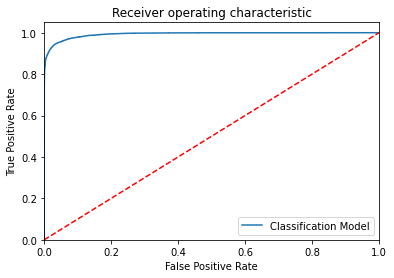

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[10685   718]
 [  279 14294]]
Outcome values : 
 10685 718 279 14294
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96     11403
           0       0.95      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy : 96.2 %
Precision : 97.5 %
Recall : 93.7 %
F1 Score : 0.955
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 95.9 %
MCC : 0.922
roc_auc_score: 0.959


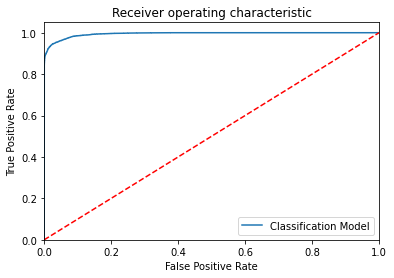

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[10403  1000]
 [  564 14009]]
Outcome values : 
 10403 1000 564 14009
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.91      0.93     11403
           0       0.93      0.96      0.95     14573

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Accuracy : 94.0 %
Precision : 94.9 %
Recall : 91.2 %
F1 Score : 0.93
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 93.6 %
MCC : 0.878
roc_auc_score: 0.937


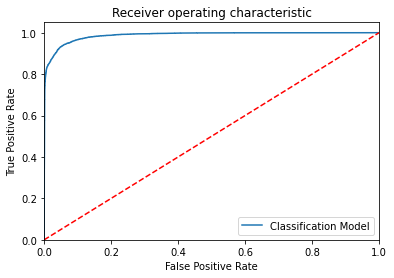

-----------------------------------------------------------------------------------------------------


In [21]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN,ModelGNB,modelXGB, ModelLGB, ModelGB ]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [24]:
Results.head(13)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,LogisticRegression(),0.871,0.887,0.810,0.847,0.919,0.738,0.864589,0.864,2168.0,1176.0,13397.0,9235.0
1,DecisionTreeClassifier(),0.933,0.919,0.929,0.924,0.935,0.864,0.932451,0.932,805.0,940.0,13633.0,10598.0
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.960,0.973,0.934,0.953,0.979,0.918,0.956899,0.956,749.0,299.0,14274.0,10654.0
3,"(ExtraTreeClassifier(random_state=1364614500),...",0.962,0.973,0.939,0.956,0.980,0.923,0.959244,0.960,701.0,292.0,14281.0,10702.0
4,KNeighborsClassifier(),0.929,0.956,0.879,0.916,0.969,0.858,0.923898,0.924,1378.0,457.0,14116.0,10025.0
5,GaussianNB(),0.862,0.876,0.798,0.835,0.912,0.719,0.854598,0.855,2309.0,1287.0,13286.0,9094.0
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.957,0.965,0.935,0.950,0.974,0.913,0.954534,0.954,738.0,382.0,14191.0,10665.0
7,LGBMClassifier(),0.962,0.975,0.937,0.955,0.981,0.922,0.958945,0.959,718.0,279.0,14294.0,10685.0
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.940,0.949,0.912,0.930,0.961,0.878,0.936801,0.936,1000.0,564.0,14009.0,10403.0
